In [1]:
# HIDDEN
from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
# HIDDEN
from matplotlib import patches
import shapely.geometry as sg
import descartes

ModuleNotFoundError: No module named 'shapely'

In [3]:
# HIDDEN
def show_intersection():
    plt.figure(figsize=(8, 16))
    # create the circles with shapely
    a = sg.Point(-.5,0).buffer(1.0)
    b = sg.Point(0.5,0).buffer(0.75)

    # compute the 3 parts
    left = a.difference(b)
    right = b.difference(a)
    middle = a.intersection(b)

    # use descartes to create the matplotlib patches
    ax = plt.subplot(121)
    ax.add_patch(descartes.PolygonPatch(left, fc='darkblue', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='k', alpha=0.6))
    ax.add_patch(descartes.PolygonPatch(middle, fc='olive', ec='k', alpha=0.8))
    ax.annotate('A', [-0.5, 0])
    ax.annotate('B', [0.5, 0])

    # control display
    plt.title('Two Events')
    plt.axis('off')
    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

    # use descartes to create the matplotlib patches
    ax = plt.subplot(122)
    ax.add_patch(descartes.PolygonPatch(left, fc='None', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(right, fc='None', ec='k', alpha=0.8))
    ax.add_patch(descartes.PolygonPatch(middle, fc='blue', ec='k', alpha=0.8))

    # control display
    plt.title('The Intersection')
    plt.axis('off')
    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
    ax.set_aspect('equal')

## Multiplication ##

The main axiom of probability is about mutually exclusive events, and it turns out that we don't need any further axioms to deal with events that intersect.

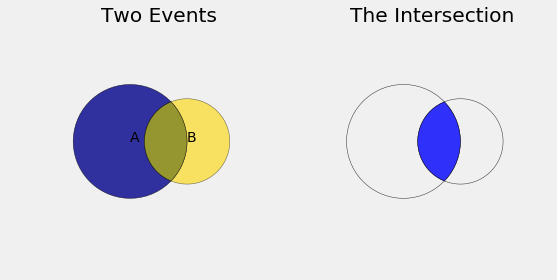

In [4]:
# NO CODE
show_intersection()

Let $A$ and $B$ be two events. The *intersection* $A \cap B$ is the event that both $A$ and $B$ occur, and is shown in bright blue in the Venn diagram on the right. 

Because we will encounter intersections all the time, we'll be a little lazy in our notation: we will use $AB$ to denote the intersection and not bother writing the intersection symbol $\cap$. You will have to keep in mind that $AB$ is an event, not a product.

Here is an example that will help explain some definitions we are about to make.

### Random Draws Without Replacement ###
Suppose I have a little deck consisting of one red card, one green, and one blue. Suppose I shuffle the cards, draw one, shuffle the remaining two, and draw one from those. This is called *drawing two cards at random without replacement* from the deck.

A reasonable outcome space is $\Omega = \{ \text{RG, RB, GB, GR, BR, BG}\}$ in which all six elements are equally likely. 

The chance that we get the green card first, followed by the red, is the chance of the event consisting of the single sequence GR:

$$
P(\{ \text{GR} \}) = \frac{\#\{\text{GR}\}}{6} = \frac{1}{6}
$$

This simple calculation contains something more interesting. Notice that

$$
P(\{ \text{GR} \}) = \frac{1}{6} = \frac{1}{3} \times \frac{1}{2}
$$

In [1]:
# NO CODE

# VIDEO: Fractions of Fractions
from IPython.display import YouTubeVideo

YouTubeVideo("Nd_gWqoMah4")

### Conditional Probability ###

Let's try to interpret the two fractions in the product. The first factor is not hard to identify.

$$
P(\text{G comes first}) = \frac{\#\{\text{GR, GB}\}}{6} = \frac{2}{6} = \frac{1}{3}
$$

What about that second factor of $1/2$? To understand that, **look only among the pairs in which G came first**. Among these, only one gives us R as the next card. The second factor in the product is

$$
\frac{\#\{\text{GR}\}}{\#\{\text{GR, GB}\}} = \frac{1}{2}
$$

This fraction is called *the conditional probability that R comes second, given that G came first*. 

It is denoted $P(\text{second card R} \mid \text{first card G})$. That's a vertical bar, not slanted.

Now our original calculation for the pair of cards can be written one card at a time:

$$
\begin{align*}
P(\{ \text{GR} \}) &= \frac{\#\{\text{GR}\}}{6} \\ \\
&= \frac{\#\{\text{GR, GB}\}}{6} \times \frac{\#\{\text{GR}\}}{\#\{\text{GR, GB}\}} \\ \\
&= P(\text{first card G}) \times P(\text{second card R} \mid \text{first card G})
\end{align*}
$$

Calculations like the one above motivate a new definition. Let $A$ and $B$ be two events. Then the *conditional probability of $B$ given $A$* is defined by the following rule.

### Division Rule ###
$$
P(B \mid A) = \frac{P(AB)}{P(A)}
$$

There is some abuse of notation here. "$B \mid A$" is not an event. But the notation is convenient. The entire left hand side should be read as "the probability that $B$ happens given that $A$ has happened." 

The definition says: You're given that $A$ happened, so restrict your attention to the outcomes in which $A$ happens. That's your whole space now, so all chances have to be calculated relative to $P(A)$. Now what's the chance that $B$ happened as well? The answer is $\frac{P(AB)}{P(A)}$.

We are dividing by $P(A)$, and the more careful among you might be wondering what happens if $P(A) = 0$. Well, in that case we wouldn't be given that $A$ happened, because $A$ can't happen. So that's not a case we have to worry about.

In [2]:
# NO CODE

# VIDEO: Conditional Probability
from IPython.display import YouTubeVideo

YouTubeVideo("YE9p2cprkOI")

```{admonition} Quick Check
A random number generator makes one draw at random from the 10 digits $0, 1, 2, 3, 4, 5, 6, 7, 8, 9$. Pick the correct option: Given that the number drawn is greater than 5, the chance that it is a prime number is
    
(i) $\frac{1}{10}$ $~~~$ (ii) $\frac{1}{5}$ $~~~$ (iii) $\frac{1}{4}$
```

```{admonition} Answer
:class: dropdown
(iii)
```

```{admonition} Quick Check
In a population of students, 75% don't own a car, 10% own a car and no bike, and 15% own a car as well as a bike. Given that a randomly picked student owns a car, what is the chance that they also own a bike?
```

```{admonition} Answer
:class: dropdown
$0.6$
```

### Multiplication Rule ###
This is just a rearrangement of the definition of conditional probability, but it is perhaps the most commonly used rule of all.

Let $A$ and $B$ be two events. Then the chance that they both happen is

$$
P(AB) = P(A) \cdot P(B \mid A)
$$

Notice that the answer is "a fraction of a fraction". The chance that $A$ and $B$ both happen is *smaller* than the chance that $A$ happens – the more conditions you put on an event, the less likely it is to happen.

Since $AB \subseteq B$, you know that $P(AB)$ is smaller than $P(B)$. You also check that

$$
P(AB) = P(B) \cdot P(A \mid B)
$$

We will end this section with some quick examples. The next section contains some examples that require a little more work.

### Example 1: Two Aces in Two Cards ###
A standard deck consists of 52 cards of which 4 are aces. Two cards are dealt at random without replacement. 

**Question 1.** What is the chance that the second card is an ace, given that the first card is an ace?

**Answer 1.** $\frac{3}{51}$ because now your deck has 51 cards of which 3 are aces.

**Question 2.** What is the chance that both cards are aces?

**Answer 2.** By the multiplication rule and Answer 1, the answer is

$$
\frac{4}{52} \cdot \frac{3}{51}
$$

**Question 3.** How would your answers to Questions 1 and 2 change if the cards were dealt *with* replacement instead?

**Answer 3.** (Who on earth deals cards with replacement? Only in a probability class ...) You're throwing the card back before pulling out the second one. Under this assumption you're drawing from exactly the same deck each time, so

$$
P(\text{second card is an ace} \mid \text{first card is an ace}) = \frac{4}{52}
$$
and the answer would have been the same no matter what the first card was. Also,

$$
P(\text{both aces}) = \frac{4}{52} \cdot \frac{4}{52}
$$

Notice that changing the nature of the randomization doesn't change *whether* you multiply chances. You're still finding the chance of an intersection, so you're going to multiply. The change in assumption just changes *what* you multiply.


### Example 2: 99-Year-Olds ###
According to Census estimates that you saw in Data 8, the population of the United States in 2014 was 318,857,056. There were 9,037 99-year-old men, and 32,791 99-year-old women. 

**Question.** Suppose you picked one person at random from the US population in 2014, and that person was 99 years old. Given this information, what is the chance that the person was female?

**Answer.** The natural answer is the percent of women among 99-year-olds:

$$
\frac{32791}{32791 + 9037} = 78.4\%
$$

This is consistent with the definition of conditional probability, that says you should calculate

$$
\begin{align*}
P(\text{woman} \mid \text{99 years old}) &= 
\frac{P(\text{woman and 99 years old})}{P(\text{99 years old})} \\ \\
&= \frac{32791\big{/}318857056}{(32791 + 9037)\big{/}318857056} \\ \\
&= \frac{32791}{32791 + 9037} = 78.4\%
\end{align*}
$$

The overall US population figure isn't needed; it cancels out. This is an important observation about conditioning. When you're sampling at random and you know that your selection is in a specific subgroup, the numbers within that subgroup are all that matters.

Given an age of 99 years, the person is almost four times more likely to be female than male. But as you saw in Data 8, among our youngest residents – the newborns – there are more males than females.